In [8]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
online_news_popularity = pd.read_csv("OnlineNewsPopularity.csv")

In [10]:
online_news_popularity.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.559889,1.0,0.698198,2,2,0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731,8,960,0.418163,1.0,0.549834,21,20,20,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,0.433574,1.0,0.572108,20,20,20,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731,11,97,0.670103,1.0,0.836735,2,0,0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731,10,231,0.636364,1.0,0.797101,4,1,1,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [11]:
online_news_popularity.shape

(39644, 61)

In [12]:
online_news_popularity.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [13]:
online_news_popularity.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

<ipython-input-14-e170a679c78b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(online_news_popularity.corr().round(2), vmin=-1, vmax=1, annot=True)


Text(0.5, 1.0, 'Correlation Matrix')

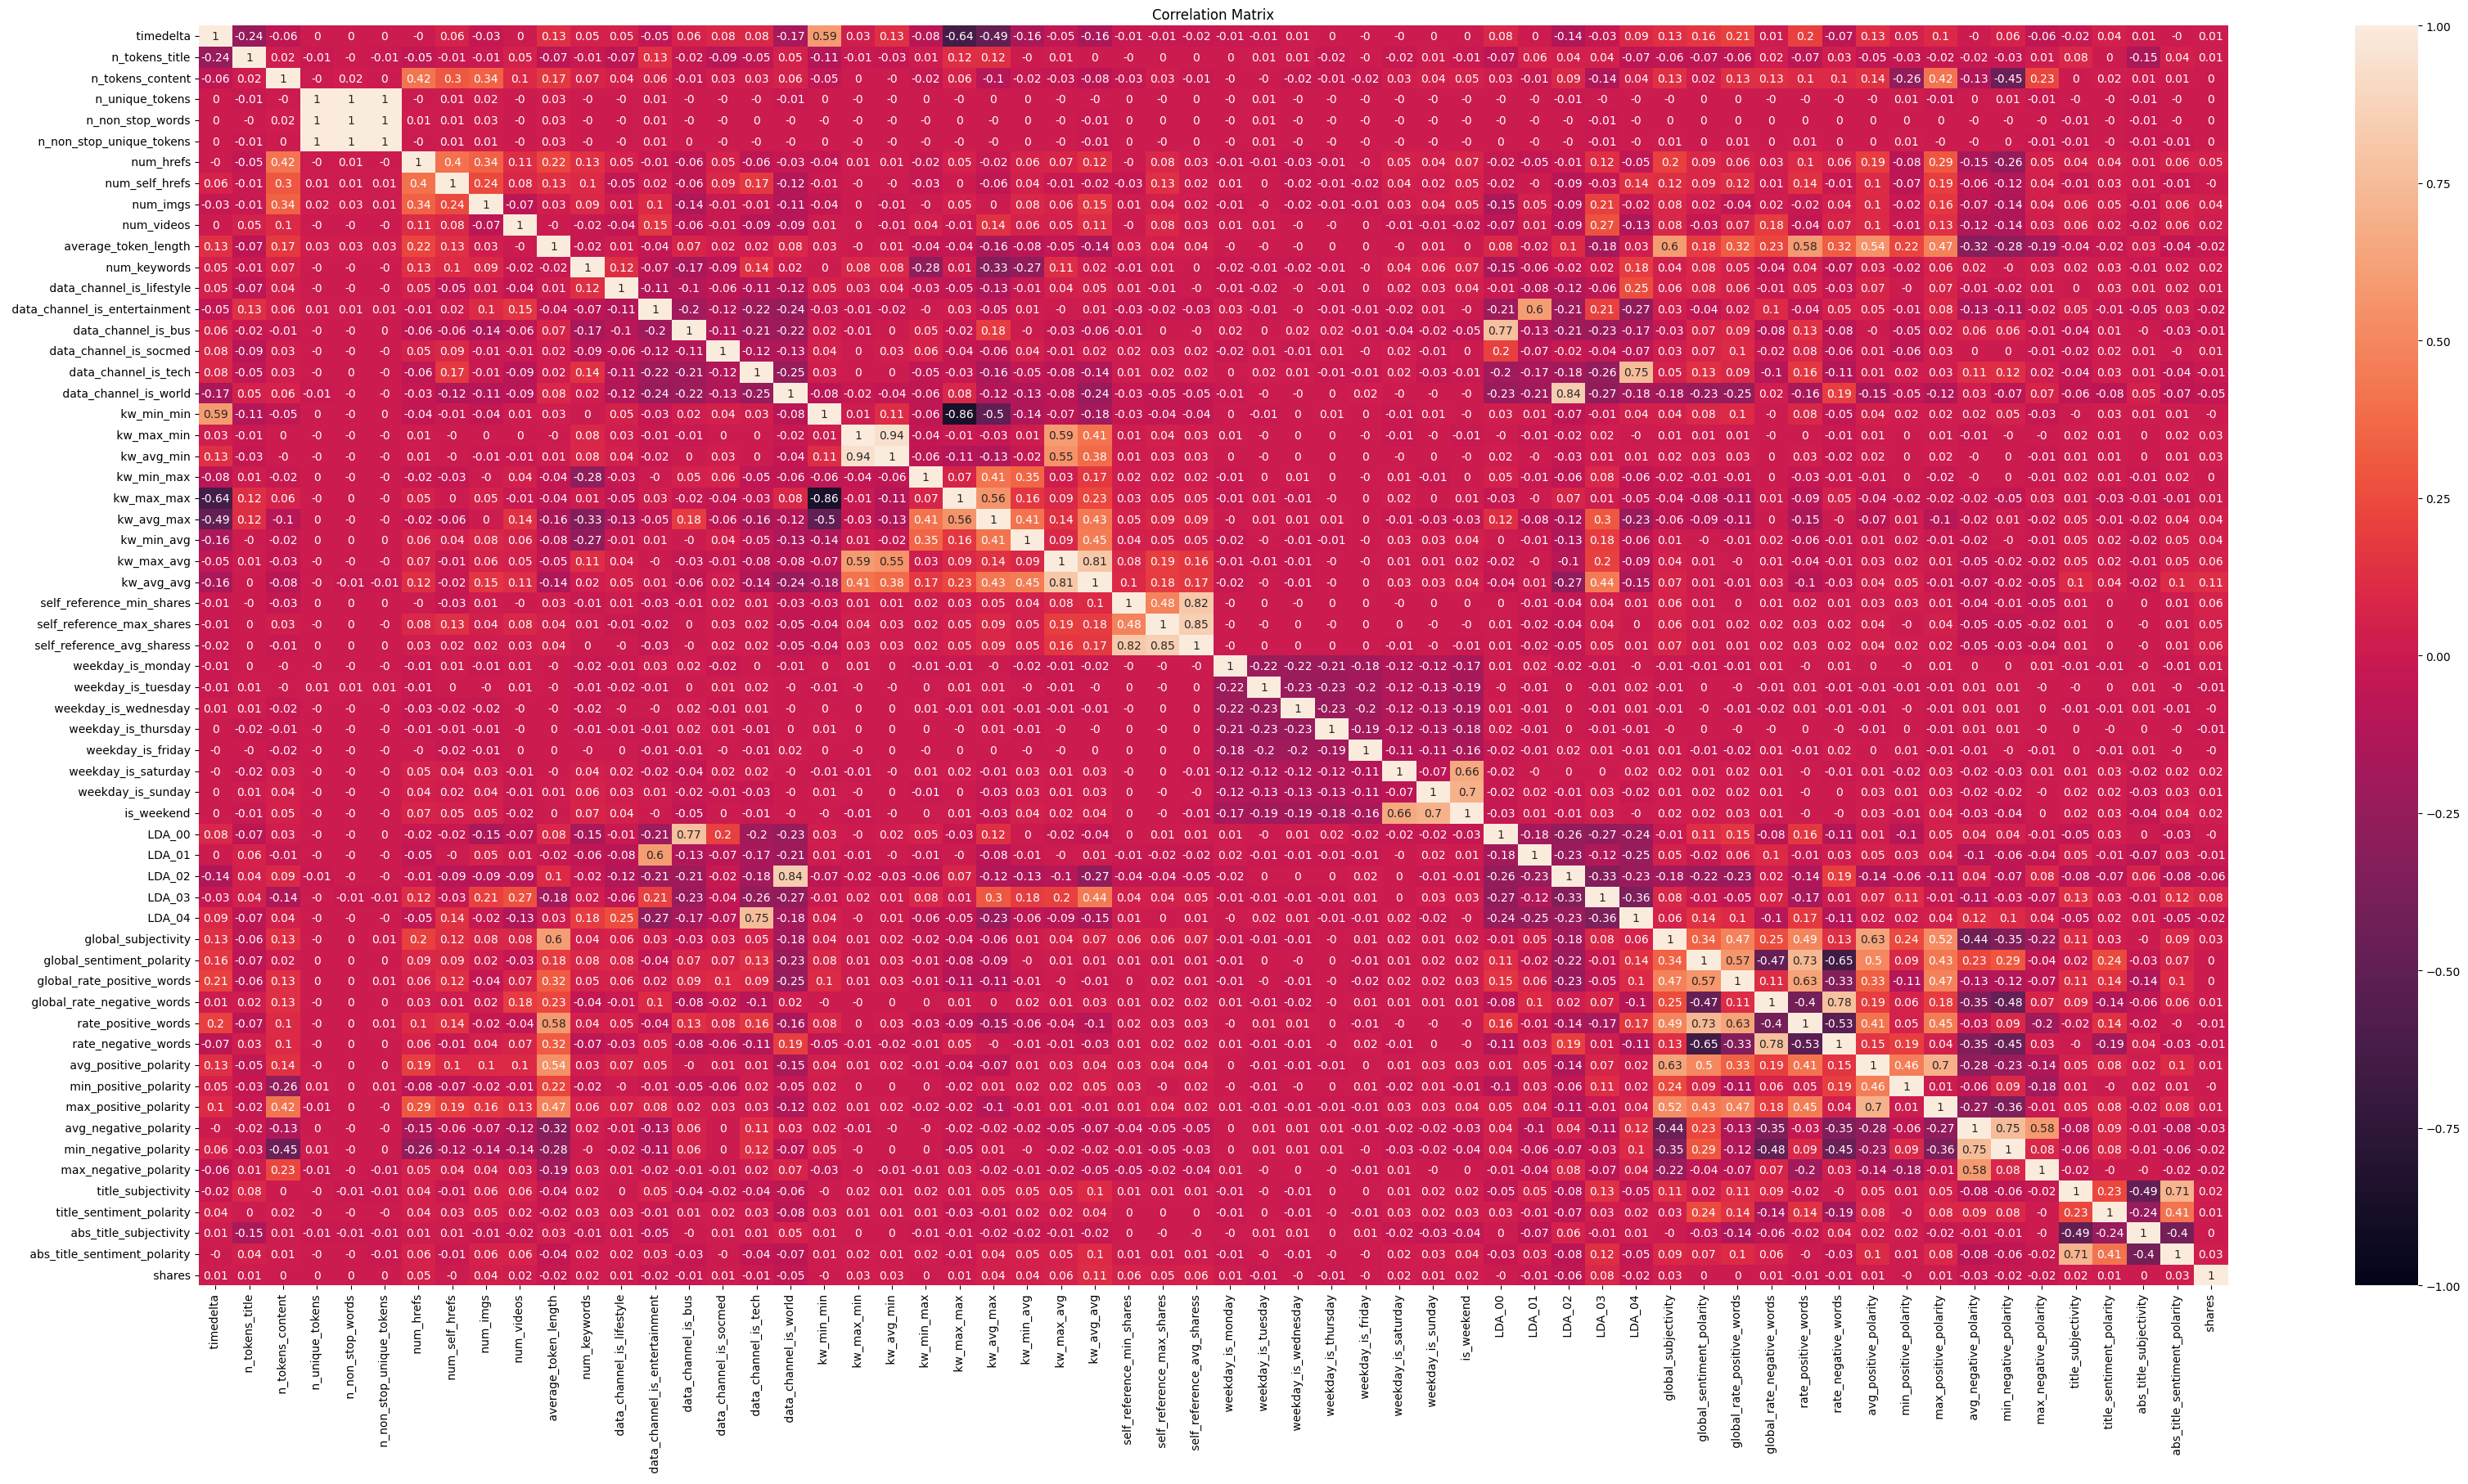

In [14]:
plt.figure(figsize=(40,20))
heatmap = sns.heatmap(online_news_popularity.corr().round(2), vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlation Matrix")

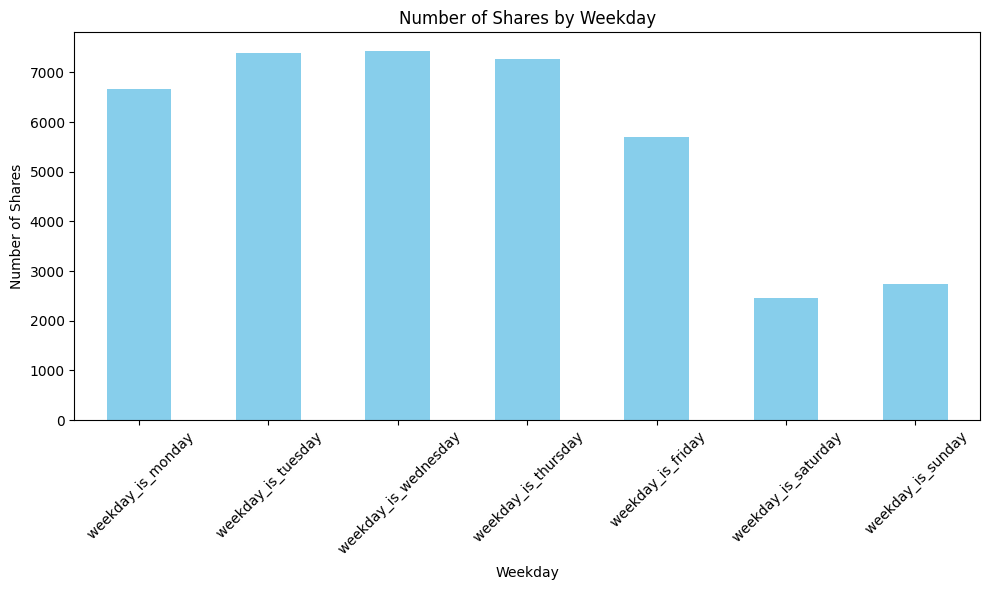

In [15]:
plt.figure(figsize=(10, 6))
pd.DataFrame(online_news_popularity, columns=[' weekday_is_monday',
    ' weekday_is_tuesday',
    ' weekday_is_wednesday',
    ' weekday_is_thursday',
    ' weekday_is_friday',
    ' weekday_is_saturday',
    ' weekday_is_sunday']).sum().plot(kind='bar', color='skyblue')
plt.title('Number of Shares by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Shares')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

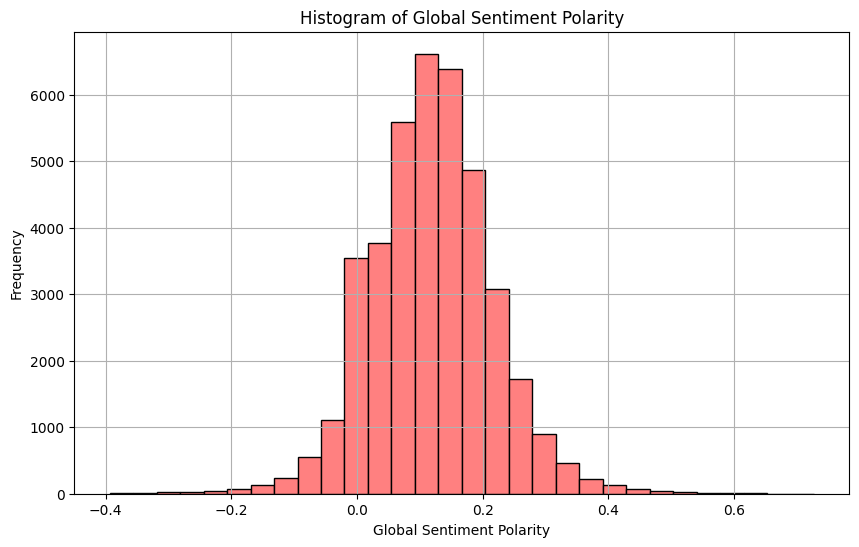

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(online_news_popularity[' global_sentiment_polarity'], bins=30, color=(1.0, 0.5, 0.5), edgecolor='black')
plt.title('Histogram of Global Sentiment Polarity')
plt.xlabel('Global Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [17]:
online_news_popularity[online_news_popularity[" weekday_is_monday"] == 1]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39574,http://mashable.com/2014/12/25/romanian-childr...,10,13,367,0.534819,1.0,0.647059,9,3,1,...,0.136364,0.5,-0.363095,-0.500000,-0.125000,0.454545,0.136364,0.045455,0.136364,1400
39575,http://mashable.com/2014/12/25/samsung-galaxy-...,10,13,321,0.619048,1.0,0.691542,25,1,1,...,0.033333,0.7,-0.640000,-1.000000,-0.100000,0.500000,-0.350000,0.000000,0.350000,1300
39576,http://mashable.com/2014/12/25/selfie-stick-id...,10,12,454,0.607477,1.0,0.709459,27,1,1,...,0.100000,0.8,-0.230848,-0.625000,-0.100000,0.000000,0.000000,0.500000,0.000000,1500
39577,http://mashable.com/2014/12/25/snowstorm-mosco...,10,11,363,0.594828,1.0,0.710526,14,1,2,...,0.100000,0.8,-0.161111,-0.166667,-0.155556,0.000000,0.000000,0.500000,0.000000,642


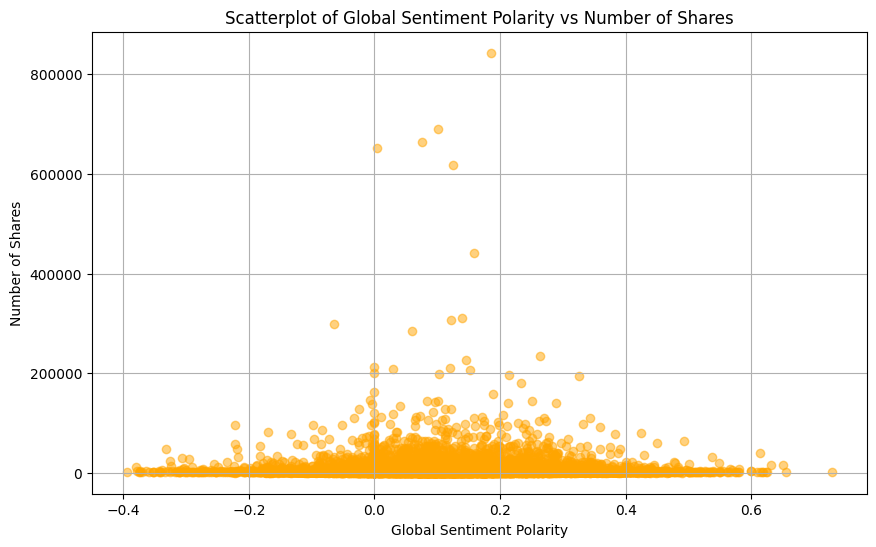

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(online_news_popularity[' global_sentiment_polarity'], online_news_popularity[' shares'], color="orange", alpha=0.5)
plt.title('Scatterplot of Global Sentiment Polarity vs Number of Shares')
plt.xlabel('Global Sentiment Polarity')
plt.ylabel('Number of Shares')
plt.grid(True)
plt.show()

In [21]:
online_news_popularity[" shares"] = pd.qcut(online_news_popularity[" shares"], q=3, labels=False)

ValueError: Bin edges must be unique: array([0., 0., 1., 2.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [20]:
X = online_news_popularity.drop(["url", " timedelta", " shares"], axis=1)
y = online_news_popularity[" shares"]

print(X)
print(y)

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                   12                219          0.663594   
1                    9                255          0.604743   
2                    9                211          0.575130   
3                    9                531          0.503788   
4                   13               1072          0.415646   
...                ...                ...               ...   
39639               11                346          0.529052   
39640               12                328          0.696296   
39641               10                442          0.516355   
39642                6                682          0.539493   
39643               10                157          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385           4   
1                    1.0                   0.791946           3   
2                    1.0                  

In [22]:
pca = PCA(n_components=len(X.columns)-12)
X_pca = pca.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state = 42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
knn = KNeighborsClassifier(n_neighbors=(math.floor(len(online_news_popularity)**(0.5))))

In [26]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=199)

In [27]:
predictions = knn.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))

Accuracy Score:  0.4790011350737798
Confusion Matrix:  [[2374  273  357]
 [1368  431  580]
 [1180  373  993]]


In [28]:
counter = {}
for pred in predictions:
  if pred not in counter:
    counter[pred] = 0
  counter[pred] += 1

counter2 = {}
for pred in y_test:
  if pred not in counter2:
    counter2[pred] = 0
  counter2[pred] += 1

print(counter)
print(counter2)
for group in counter:
  print(abs(counter2[group] - counter[group]))

{0: 4922, 1: 1077, 2: 1930}
{2: 2546, 1: 2379, 0: 3004}
1918
1302
616
